<div class="alert alert-info"> <h1> Unsupervised Learning Approach: K-Means Clustering </h1>
<p> <b>Ziel von k-means </b>: Aufteilung der Daten in k Gruppen basierend auf Ähnlichkeiten der Features. Jedes Zentrum K ist gekennzeichnet durch ein Centroid Marker, die anderen Datenpunkte arrangieren sich drumherum</p>
<h3> Schritte: </h3>
<ol> <li> <b> k bestimmen</b>: Wieviele Cluster k werden benötigt?
<li> <b> Initialisiere die Centroids </b>
<li> <b> Clusters Zuweisen </b>: Verwende Metriken wie Manhattan Distance, Euklidische Distanz, Chebyhev
</ol>
$$d_{\text{euclid}}(p, q) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2}$$
$$d_{\text{manhattan}}(p, q) = \sum_{i=1}^{n} |p_i - q_i|$$
$$d_{\text{chebyshev}}(p, q) = \max_{i} |p_i - q_i|$$



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, 2:4]
y = iris.target

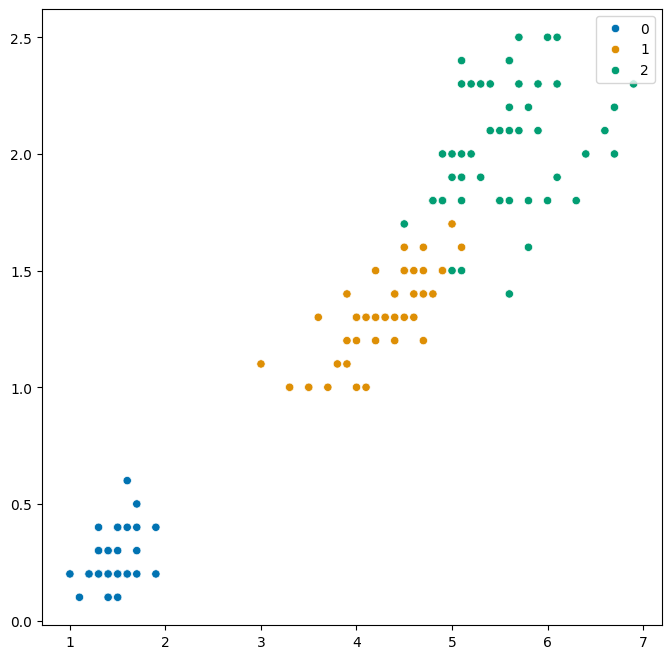

In [3]:
plt.figure(figsize = (8,8))
colors = sns.color_palette("colorblind", n_colors=3)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=colors)
plt.show()

<div class="alert alert-info"> <h3> definiere die Cluster anhand des Plots: entscheide für <b> k=3

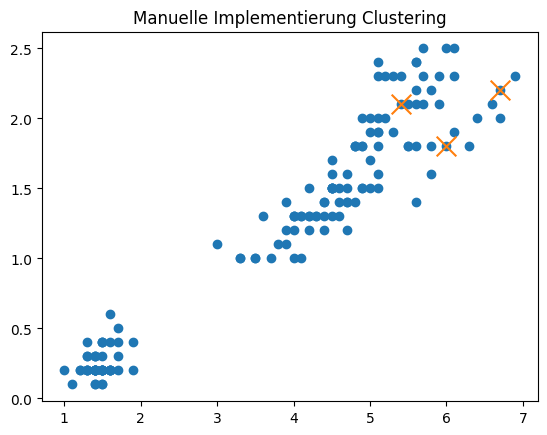

In [4]:
k = 3
random_index = np.random.choice(range(len(X)), k)
centroids = X[random_index]

def visualize_centroids(X, centroids):
    plt.scatter(X[:, 0], X[:, 1])
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200)
    plt.title('Manuelle Implementierung Clustering')
    plt.show()


visualize_centroids(X, centroids)

In [5]:
def dist(a, b):
    return np.linalg.norm(a - b, axis=1)

def assign_cluster(x, c):
    distance = dist(x, c)
    cluster = np.argmin(distance)
    return cluster

def update_centroids(X, c, cluster):
    for i in range(k):
        cluster_i = np.where(cluster == i)
        centroids[i] = np.mean(X[cluster_i], axis=0)

In [6]:
tol = 0.0001
max_iter = 100
iter = 0
centroids_diff = 100000
clusters = np.zeros(len(X))

iteration: 1,
centroids: [[5.95       1.95      ]
 [3.46865672 1.09925373]
 [6.56666667 2.18333333]]
centroids diff: 2.18509394050314


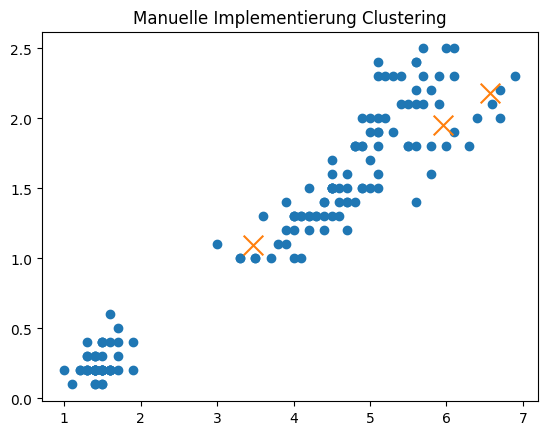

iteration: 2,
centroids: [[5.358      1.952     ]
 [2.72765957 0.73617021]
 [6.56666667 2.18333333]]
centroids diff: 1.0155660519337504


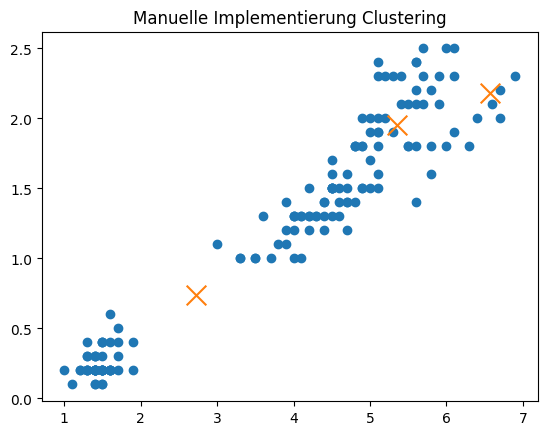

iteration: 3,
centroids: [[4.97534247 1.73561644]
 [2.03880597 0.47164179]
 [6.39       2.16      ]]
centroids diff: 0.8772107864716652


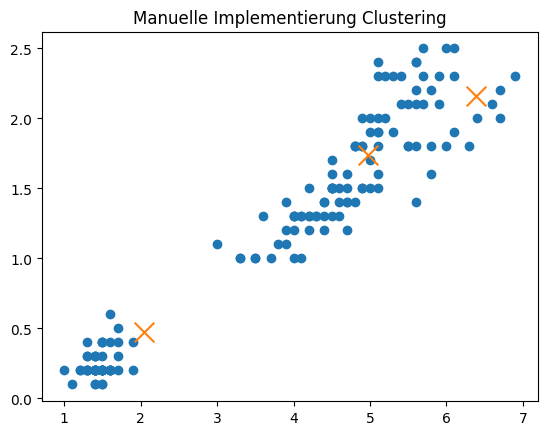

iteration: 4,
centroids: [[4.68378378 1.58648649]
 [1.63090909 0.31636364]
 [6.06666667 2.14761905]]
centroids diff: 0.6343777340180505


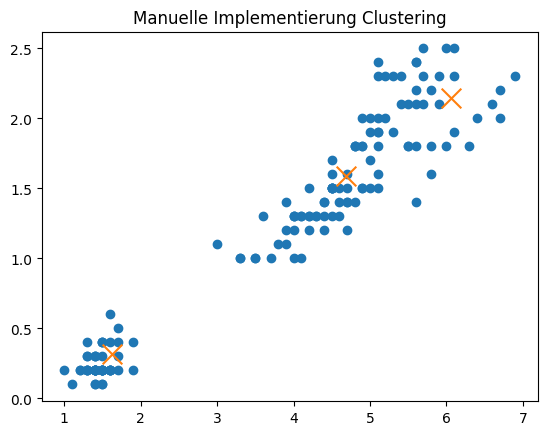

iteration: 5,
centroids: [[4.47761194 1.48059701]
 [1.49215686 0.2627451 ]
 [5.8625     2.103125  ]]
centroids diff: 0.34570259726740993


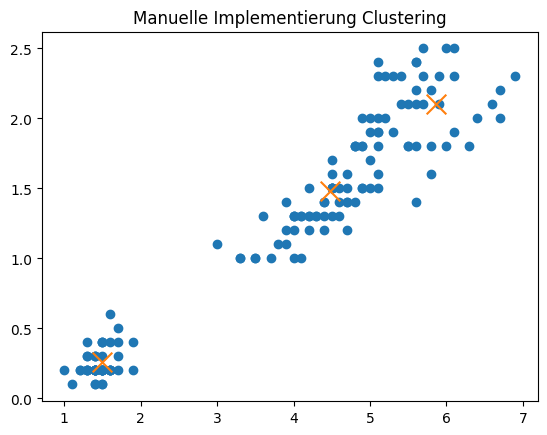

iteration: 6,
centroids: [[4.4        1.42380952]
 [1.462      0.246     ]
 [5.76756757 2.10540541]]
centroids diff: 0.13948345450071445


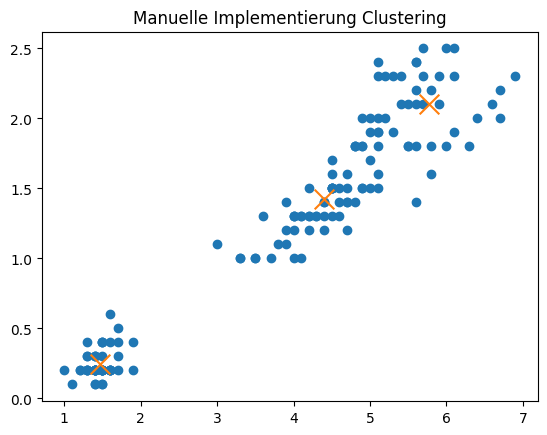

iteration: 7,
centroids: [[4.35423729 1.39152542]
 [1.462      0.246     ]
 [5.7        2.08536585]]
centroids diff: 0.09001915760780703


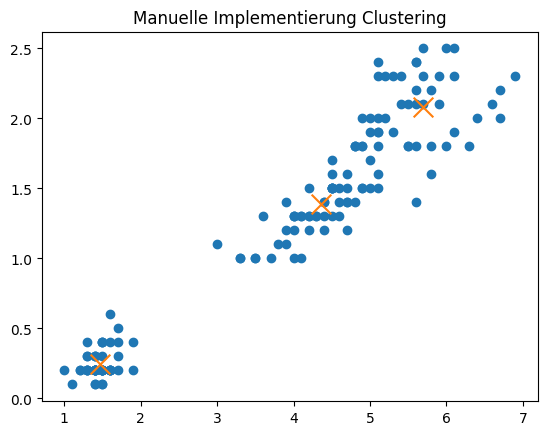

iteration: 8,
centroids: [[4.31964286 1.36785714]
 [1.462      0.246     ]
 [5.65227273 2.06818182]]
centroids diff: 0.06580384344686917


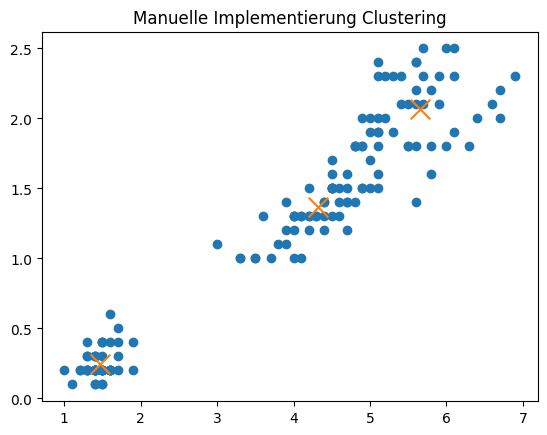

iteration: 9,
centroids: [[4.30727273 1.36181818]
 [1.462      0.246     ]
 [5.63777778 2.06      ]]
centroids diff: 0.02159941834993372


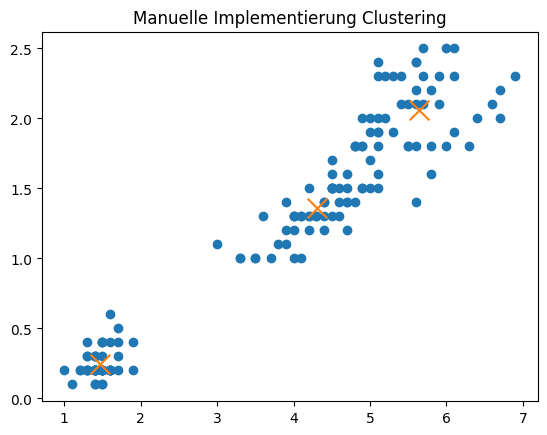

iteration: 10,
centroids: [[4.29259259 1.35925926]
 [1.462      0.246     ]
 [5.62608696 2.04782609]]
centroids diff: 0.02251519263342539


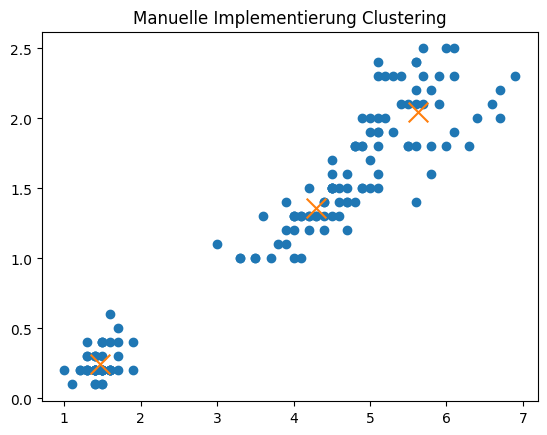

iteration: 11,
centroids: [[4.29259259 1.35925926]
 [1.462      0.246     ]
 [5.62608696 2.04782609]]
centroids diff: 0.0


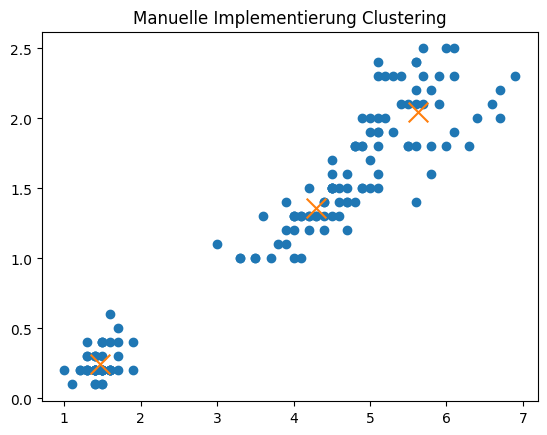

In [7]:
from copy import deepcopy
while iter < max_iter and centroids_diff > tol:
    for i in range(len(X)):
        clusters[i] = assign_cluster(X[i], centroids)
    centroids_prev = deepcopy(centroids)
    update_centroids(X, centroids, clusters)
    iter += 1
    centroids_diff = np.linalg.norm(centroids - centroids_prev)
    print(f'iteration: {iter},\ncentroids: {centroids}\ncentroids diff: {centroids_diff}')
    visualize_centroids(X, centroids)

<div class="alert alert-success"><h2>Erfolg: Nach Iteration 16 gute Centroids gefunden </h2>
<h3> einfachere Variante: Verwende sklearn.cluster 

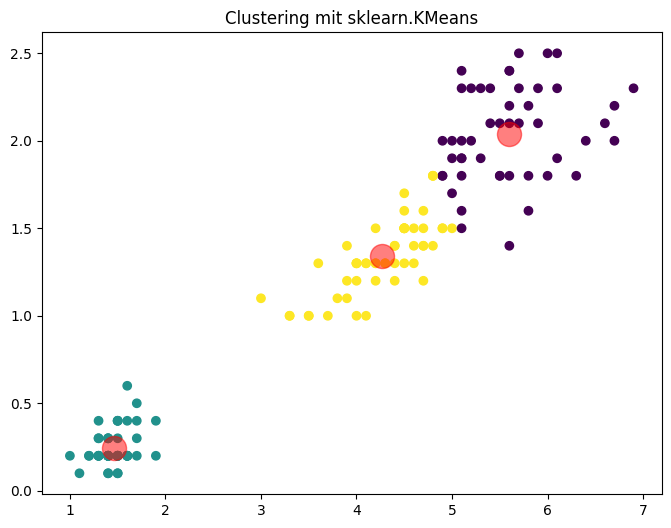

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

clusters_sk = kmeans.labels_
centroids_sk = kmeans.cluster_centers_
plt.figure(figsize=(8, 6))

plt.scatter(X[:, 0], X[:, 1], c=clusters_sk)
plt.scatter(centroids_sk[:, 0], centroids_sk[:, 1], marker='o', c='r', s=300, alpha=0.5)
plt.title('Clustering mit sklearn.KMeans')
plt.show()

<div class="alert alert-info"><h2> Weitere Methode zum Bestimmen von k: <b> Ellbow Method </b> </h2>
<p> Ellbow Methode: Berechne die Summe der squared-errors für jedes k und Cluster. Wähle dann das k, bei dem der größte Anstieg vorliegt

In [9]:
from sklearn.cluster import KMeans

X = iris.data
y = iris.target

k_list = list(range(1, 7))
sse_list = [0] * len(k_list)

for k_ind, k in enumerate(k_list):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    clusters = kmeans.labels_
    centroids = kmeans.cluster_centers_
    sse = 0
    for i in range(k):
        cluster_i = np.where(clusters == i)
        sse += np.linalg.norm(X[cluster_i] - centroids[i])

        print(f'k = {k}, sse = {sse}')
        sse_list[k_ind] = sse


k = 1, sse = 26.103076447039722
k = 2, sse = 11.12635952540901
k = 2, sse = 16.469773740281195
k = 3, sse = 5.0412147498243085
k = 3, sse = 8.933643297659195
k = 3, sse = 15.12160093100892
k = 4, sse = 4.46514848805817
k = 4, sse = 8.357577035893057
k = 4, sse = 11.479961655744638
k = 4, sse = 15.017339707107098
k = 5, sse = 3.384441526226217
k = 5, sse = 7.276870074061103
k = 5, sse = 10.399254693912685
k = 5, sse = 12.556799594951826
k = 5, sse = 14.893998773455875
k = 6, sse = 3.384441526226217
k = 6, sse = 5.536350977321752
k = 6, sse = 8.658735597173335
k = 6, sse = 10.816280498212477
k = 6, sse = 13.153479676716525
k = 6, sse = 14.918158375259381


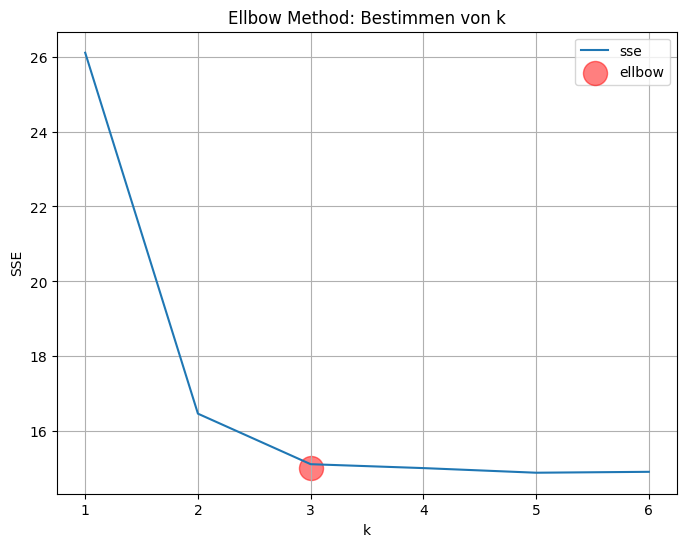

In [10]:
plt.figure(figsize=(8, 6))
plt.plot(k_list, sse_list, label='sse')
plt.scatter(k_list[2], sse_list[k_list[2]], c='r', marker='o', s=300, alpha=0.5, label='ellbow')
plt.title('Ellbow Method: Bestimmen von k')
plt.grid()
plt.xlabel('k')
plt.ylabel('SSE')
plt.legend()
plt.show()


<div class="alert alert-info"> <h2> praktisches Beispiel: <b>Clustering News Groups </b> </h2>
<p>Betrachte die folgenden Kategorien an Nachrichten:</p>
<ul>
    <li><b>'alt.atheism'</b>: Diskussionen über atheismus und verwandte Themen
    <li><b>talk.religion.misc</b>: Verschiedene Diskussionen über Religion, die nicht in spezifischere religiöse Newsgroups passen.
    <li><b>comp.graphics</b>: Diskussionen über Computergrafik, einschließlich Software, Hardware und Techniken.
    <li><b>sci.space</b>: Diskussionen über Raumfahrt, Astronomie und verwandte wissenschaftliche Themen.

In [11]:
from sklearn.datasets import fetch_20newsgroups

categories = [
    'alt.atheism', 
    'talk.religion.misc', 
    'comp.graphics',
    'sci.space'
]

groups = fetch_20newsgroups(subset='all', categories=categories)
labels = groups.target
label_names = groups.target_names

In [12]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import names
nltk.download('names')


[nltk_data] Downloading package names to
[nltk_data]     C:\Users\Amin\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!


True

In [13]:
def is_letter_only(word):
    for char in word:
        if not char.isalpha():
            return False
        return True
    
all_names = set(names.words())
lemmatizer = WordNetLemmatizer()
data_cleaned = []
for doc in groups.data:
    doc = doc.lower()
    doc_cleaned = ' '.join(lemmatizer.lemmatize(word) for word in doc.split() if word.isalpha() and word not in all_names)
    data_cleaned.append(doc_cleaned)


<div class="alert alert-info"><h3> was gemacht wurde: </h3>
<ol> 
<li> nltk Bibliotheken heruntergeladen und bestimmte Wortfamilien geladen
<li> sicherstellen, dass alles klein geschrieben ist
<li> lemmatizen der Wörter, sodass verarbeitbar wird
</ol>
<h3> jetzt: Vektorisieren der Wörter und Clustern mit <b> KMEANS</b> </h3>

<p>CountVectorizer: Convert a collection of text documents to a matrix of token counts. <br> Entfernen von Stopwords aus englischer Sprache (BSP: Deutsch: "und", "der", "die", "das"
Englisch: "and", "the", "is", "in")<br>fit_transform: Lerne das Vokabular und zähle sozusagen die häufigkeiten der tokens, sodass ein zusammenhang daraus erkennbar wird

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer(stop_words='english', max_features=None, max_df=0.5, min_df=2)

data = count_vector.fit_transform(data_cleaned)


In [15]:
from sklearn.cluster import KMeans
k = len(categories) #in dem Fall: 4, da 4 kategorien oben definiert wurden

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data)

KMeans(n_clusters=4, random_state=42)

In [16]:
clusters = kmeans.labels_
from collections import Counter
print(Counter(clusters))

Counter({3: 3370, 0: 13, 1: 3, 2: 1})


<div class="alert alert-info"><h3> <b>Ergebnis</b>: </h3>
<p> Das reine Zählen war nicht effektiv genug, da einer Kategorie vergleichsweise extrem viele Wörter vorkommen. Bessere Alternative ist daher tf-idf (Term Frequency Inverse Document Frequency)</p>
<h3><b>Erklärung tf-idf</h3></b>
tf-idf zählt die Häufigkeiten und ordnet noch einen Gewichtsfaktor zu, sodass die Daten besser interpretierbar sind

$$ idf(t, D) = \log{\frac{n_D}{1+n_t}}$$

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer(stop_words='english', max_df=0.5, min_df=2)
data = tfidf_vector.fit_transform(data_cleaned)
kmeans.fit(data)
clusters = kmeans.labels_
print(Counter(clusters))

Counter({2: 1206, 0: 1196, 3: 742, 1: 243})


In [18]:
key = list(Counter(clusters).keys())
val = list(Counter(clusters).values())

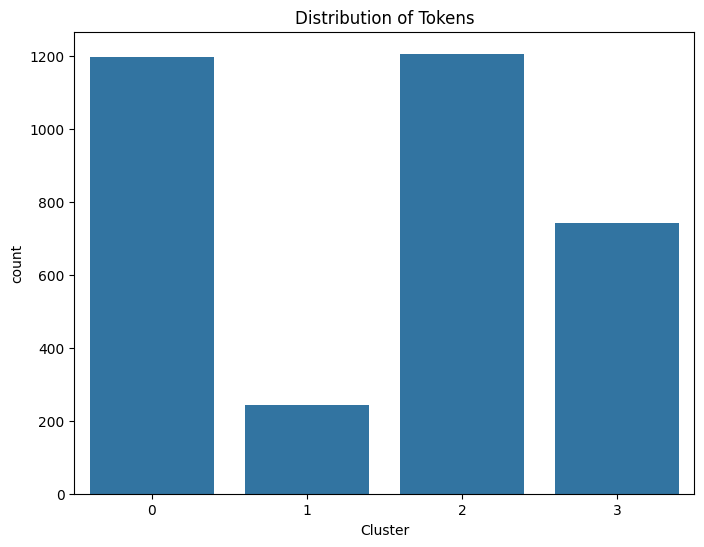

In [19]:
plt.figure(figsize=(8, 6))
import seaborn as sns

sns.barplot(x=key, y=val)
plt.title('Distribution of Tokens')
plt.ylabel('count')
plt.xlabel('Cluster')
plt.show()

<div class="alert alert-info"><h2>Ergebnis: Die Verteilung ist gleichmäßiger </h2>
<h2> <b> Discover underlying topics in newsgroups: <i>Topic Model </i></b></h2>
<p> <b><i>Topic Model</i></b>: statistical model for discovering the probability of distributions of words linked to a certain topic; <br>When reading, we expect certain words appearing in the title or the body to match the semantic context of the text <br>
<i>Topic modeling</i> is widely used for mining hidden semantic structures in given text data. There are two popular topic modeling algorithms—non-negative matrix factorization and latent Dirichlet allocation. We will go through both of these in the next two sections.

<div class="alert alert-info"><h2>NMF (Non Matrix Factorization)</h2>
<p>factorize a large matrix V into 2 smaller ones (W, H), so that there are no negative values anymore<br>

# Description of the Matrices:
- V: $n \times m$ where $n$: number of documents / samples, $m$: number of terms
- W: $t \times m$ where each row represents a topic, each element in this row represents the rank of a term
- H: $n \times t$ where each row represents a document and reach element in the row represent the weight of a topic within the document

In [20]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=20, random_state=42)
data = count_vector.fit_transform(data_cleaned)
nmf.fit(data)

NMF(n_components=20, random_state=42)

In [24]:
terms = count_vector.get_feature_names_out()
for idx, topic in enumerate(nmf.components_):
    print(f'Topic:{idx}')
    print(" ".join([terms[i] for i in topic.argsort()[-10:]]))

Topic:0
available quality program free color version gif file image jpeg
Topic:1
ha article make know doe say like just people think
Topic:2
include available analysis user software ha processing data tool image
Topic:3
atmosphere kilometer surface ha earth wa planet moon spacecraft solar
Topic:4
communication technology venture service market ha commercial space satellite launch
Topic:5
verse wa jesus father mormon shall unto mcconkie lord god
Topic:6
format message server object image mail file ray send graphic
Topic:7
christian people doe atheism believe religion belief religious god atheist
Topic:8
file graphic grass program ha package ftp available image data
Topic:9
speed material unified star larson book universe theory physicist physical
Topic:10
planetary station program group astronaut center mission shuttle nasa space
Topic:11
infrared high astronomical center acronym observatory satellite national telescope space
Topic:12
used occurs true form ha ad premise conclusion argum

<div class="alert alert-info"><h1>Real-World Example: Web Scraper text analysis

In [10]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
url = 'https://www.daikin-hbl.de/de/hbl'

response = requests.get(url=url)
soup = BeautifulSoup(response.text, 'html.parser')
headlines = [headline.get_text(strip=True) for headline in soup.find_all('div', class_='v-card-title')]

df = pd.DataFrame(headlines, columns=['headline'])

In [11]:
df.head()

,headline
0,"""DKB Spieler des Monats“ Dezember: Marko Grgic..."
1,Handball-WM 2025: 171 Spieler aus deutschen Ve...
2,"""DKB Spieler des Monats"" Dezember: Die 7 Kandi..."
3,SCM trauert um Reiner Baumgart
4,Ab Sommer 2025: Kristian Saeveras wechselt nac...


In [7]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

stopwords_ger = stopwords.words('german')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Amin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Amin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
def clean_ger(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-ZäöüÄÖÜß\s]', '', text)
    tokens = word_tokenize(text, language='german')
    tokens = [word for word in tokens if word not in stopwords_ger]


df['cleaned_headlines'] = df['headline'].apply(clean_ger)